<a id='Top'></a>
<center>
    <h1><u><b>Customer Segmentation and Analysis</b></u></h1>
<h3>Author:  Zhigang Nan</h3>
</center>

---


### Define the problem
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. This is the unsupervised clustering problem and five popular algorithms will be presented and compared: KMeans, Fuzzy C-Means, DBSCN, Hierarchical, and Affinity Propagation. 

The data set is taken from [Kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?datasetId=42674&sortBy=voteCount). It consists customers information related to their age, gender, annual income, and spending score. The spending score is a numeric variable ranging from 1 to 100 and was assigned to customers based on behavior parameters and purchasing data. 

### Steps to solve the problem
1. [Importing Libraries](#Library)<br>  
2. [Loading the Dataset](#Loading_data)<br>  
3. [Exploratory Data Analysis](#Exploratory_Data_Analysis)<br>
   3.1 [Distribution of values in Age , Annual Income and Spending Score](#Distributions)<br>
   3.2 [Correlations between numerical variables](#Correlations)<br>
4. [Clustering](#Clustering)<br>
   4.1 [K-Means](#K-Means)<br>
   &nbsp;&nbsp;&nbsp;&nbsp; 4.1.1 [K-Means 5 Clusters](#K-Mean5)<br>
   &nbsp;&nbsp;&nbsp;&nbsp; 4.1.2 [K-Means 6 Clusters](#K-Mean6s)<br>
   4.2 [Fuzzy C-Means](#FC)<br>
   4.3 [DBSCAN (Density Based Spatial Clustering of Applications with Noise)](#DBSCAN)<br>
   4.4 [Heirarchal (Agglomerative)](#Hierarchical)<br>
   4.5 [Affinity Propagation](#AF)<br>
5. [Comparison and Conclusion](#Comparison)<br>


<a id='Library'></a>
## 1. Importing Libraries.  <a href='#Top' style="text-decoration: none;"></a><br>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from itertools import product
from scipy.stats import pearsonr
import scipy.cluster.hierarchy as sch

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")

<a id='Loading_data'></a>
## 2. Loading the dataset <a href='#Top' style="text-decoration: none;"></a>

In [2]:
df = pd.read_csv('Z:/Kaggle/MallCustomerSegment/Mall_Customers.csv')
df.drop(columns = ['CustomerID'], inplace = True) 

In [3]:
# Perform Exploratory Data Analysis in just one line of code
# import pandas_profiling
# pandas_profiling.ProfileReport(df)

In [4]:
df.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
62,Female,67,47,52
170,Male,40,87,13
41,Male,24,38,92
93,Female,40,60,40
138,Male,19,74,10


There are 4 columns:
* `Gender` - categorical - binary (Male/Female)
* `Age` - numerical - integer
* `Annual Income (k$)` - numerical - integer
* `Spending Score (1-100)` - numerical - integer

<a id='Exploratory'></a>
## 3. Exploratory Data Analysis<a href='#Top' style="text-decoration: none;"></a>

<a id='Distributions'></a>
### 3.1 Distribution of values in Age , Annual Income and Spending Score according to Gender<a href='#Top' style="text-decoration: none;"></a>

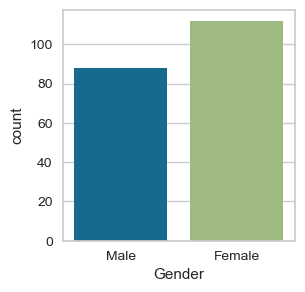

In [5]:
sns.color_palette("coolwarm", as_cmap=True)

plt.figure(1 , figsize = (3 , 3))
sns.countplot(x = 'Gender' , data = df)
plt.show()

### Histograms

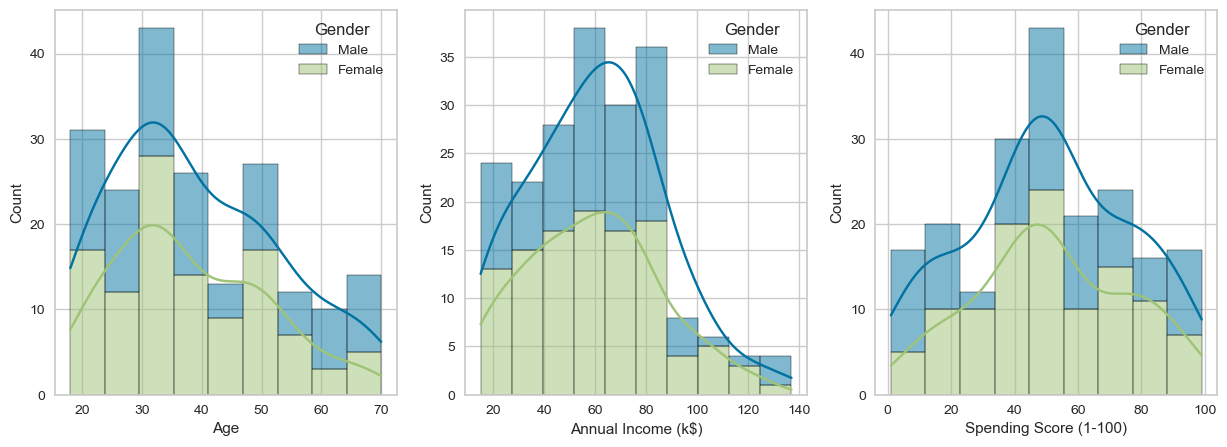

In [6]:
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
plotnumber = 0 
for col in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    sns.histplot(x=col, data=df, kde=True,ax=axes[plotnumber]
             ,hue_order=['Male','Female'], hue = 'Gender', multiple = 'stack')
    plotnumber += 1

plt.show()

### Violinplot

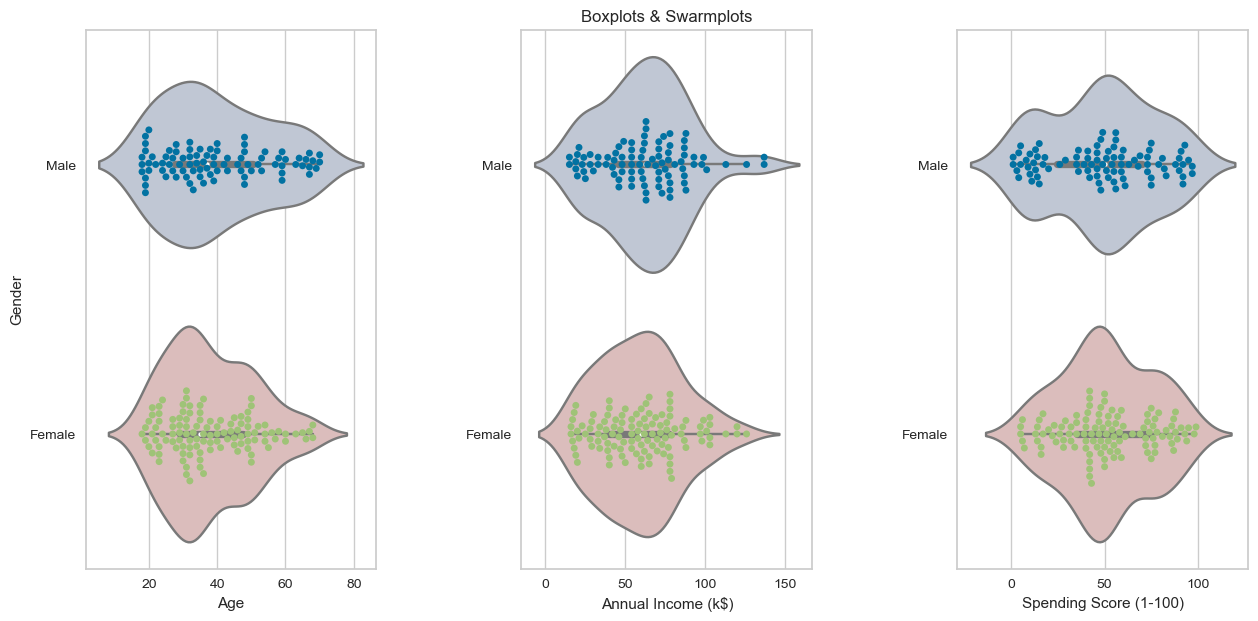

In [7]:
plt.figure(1 , figsize = (15 , 7))
plotnumber = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    plotnumber += 1 
    plt.subplot(1 , 3 , plotnumber)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if plotnumber == 1 else '')
    plt.title('Boxplots & Swarmplots' if plotnumber == 2 else '')
plt.show()

<a id='Correlations'></a>
## 3.2 Correlations between numerical variables<a href='#Top' style="text-decoration: none;"></a>

### Marginal Histogram : visualizing the relationship between features

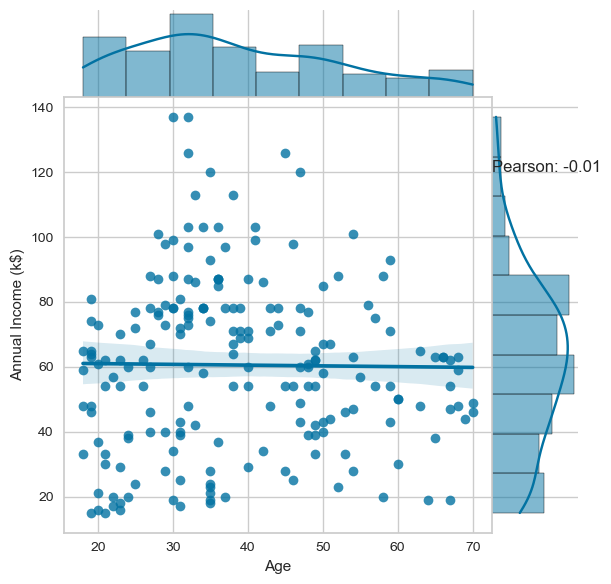

In [8]:
corr, _ = pearsonr(df['Age'], df['Annual Income (k$)'])
sns.jointplot(x="Age", y='Annual Income (k$)',data=df, kind='reg',height=6, space=0)

plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

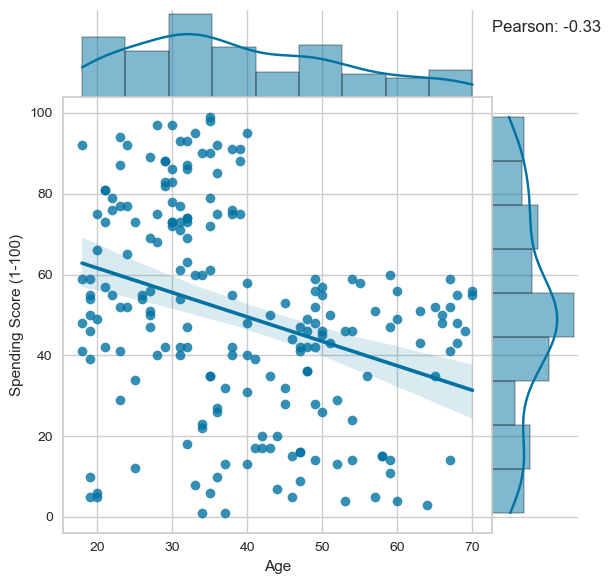

In [9]:
# calculating Pearson's correlation
corr, _ = pearsonr(df['Age'], df['Spending Score (1-100)'])
sns.jointplot(x="Age", y='Spending Score (1-100)',data=df, kind='reg',height=6, space=0)
plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

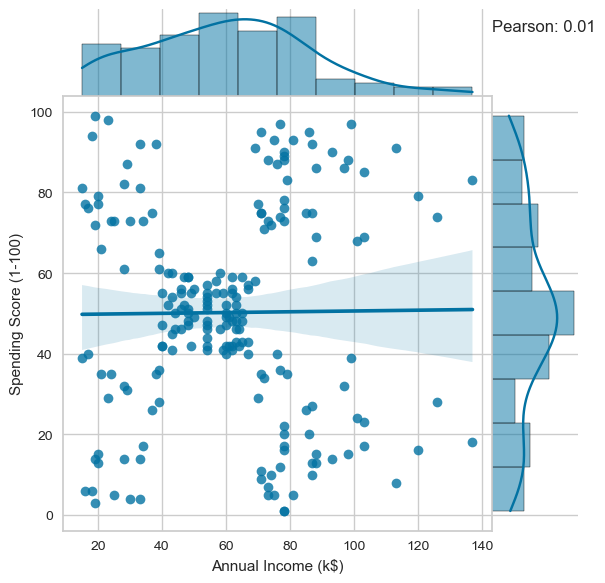

In [10]:
corr, _ = pearsonr(df['Annual Income (k$)'], df['Spending Score (1-100)'])
sns.jointplot(x='Annual Income (k$)', y='Spending Score (1-100)',data=df, kind='reg',height=6, space=0)
plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

### Scatter plot  : visualizing the relationship with linear regression line of best fit

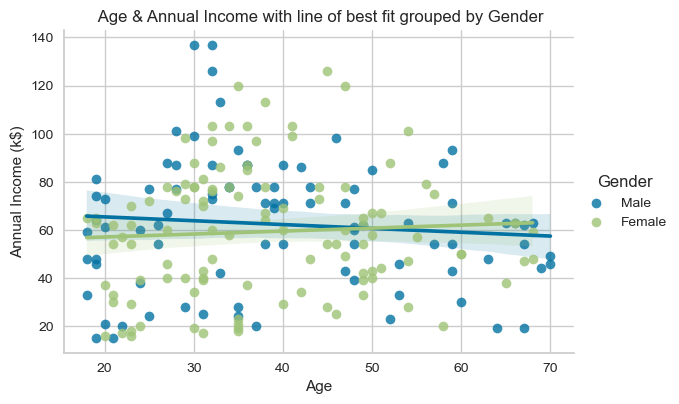

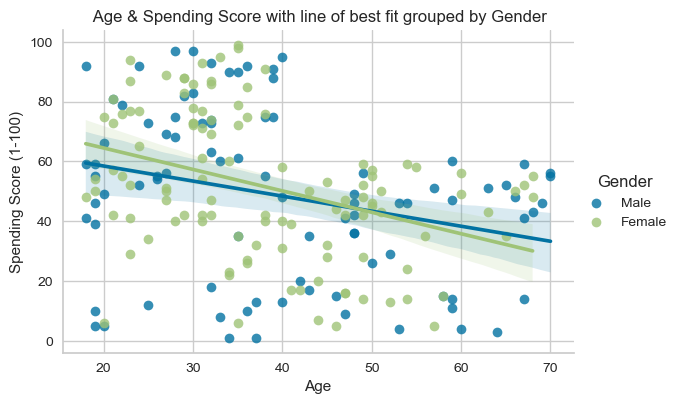

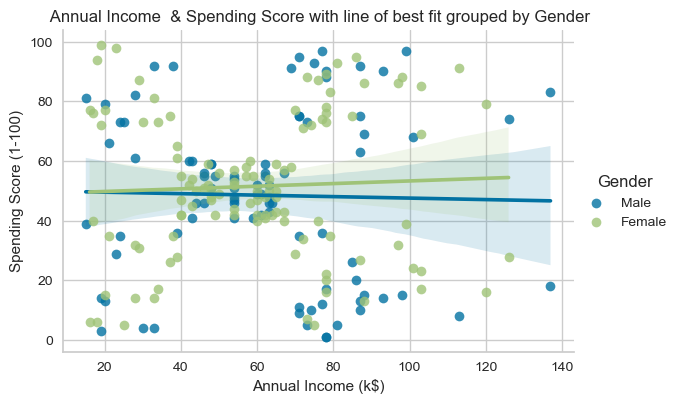

In [11]:
sns.lmplot('Age', 'Annual Income (k$)', data=df, hue='Gender', height=4, aspect=1.5)
plt.title(" Age & Annual Income with line of best fit grouped by Gender", fontsize=12)

sns.lmplot('Age', 'Spending Score (1-100)', data=df, hue='Gender',  height=4, aspect=1.5)
plt.title(" Age & Spending Score with line of best fit grouped by Gender", fontsize=12)

sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)', data=df, hue='Gender', height=4, aspect=1.5)
plt.title(" Annual Income  & Spending Score with line of best fit grouped by Gender", fontsize=12)
plt.show()

### Heatmap

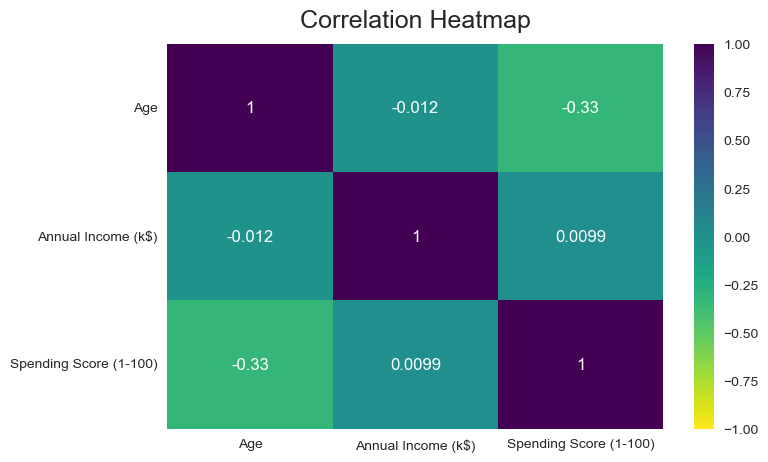

<Figure size 800x550 with 0 Axes>

In [12]:
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,  cmap='viridis_r')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

<b>We can clearly see that variales are not strongly correlated. The highest correlation we noticed is between Age and Spending Score with 33% of correlation.</b>

<a id='Clustering'></a>
## 4. Clustering<a href='#Top' style="text-decoration: none;"></a>  

* K-Means
* Fuzzy C-Means
* Heirarchal (Agglomerative) Clustering
* Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
* Affinity Propagation.

<a id='K-Means'></a>
### 4.1 K-Means<a href='#Top' style="text-decoration: none;"></a>

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid),

In [13]:
le = preprocessing.LabelEncoder()
df["Gender"]= le.fit_transform(df["Gender"]) 

col_numerics = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)','Gender']

df_numerics = df[col_numerics] 

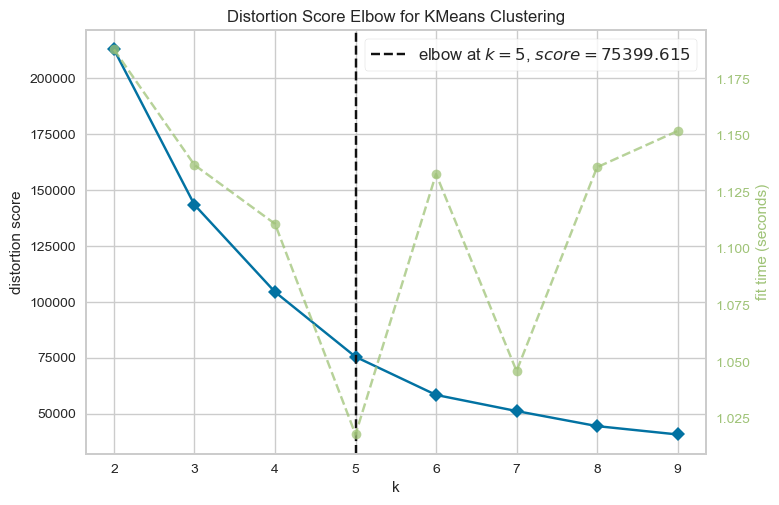

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), locate_elbow = True)

visualizer.fit(df_numerics)
visualizer.poof()

The algorithm suggests 5 clusters. But there is no clear elbow. 

Another way to choose the best number of clusters is to plot the silhuette score in a function of number of clusters.  Please see below:

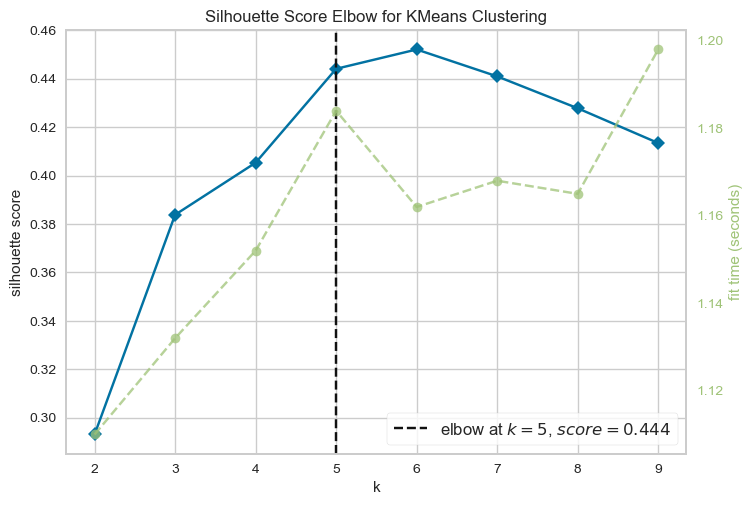

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [15]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(df_numerics)
visualizer.poof()

Silhouette score indicates the best options would be 5 clusters. But the elbow is at 6. I'm compare both 5 and 6 clusters

 ### Examine the Silhuette plot

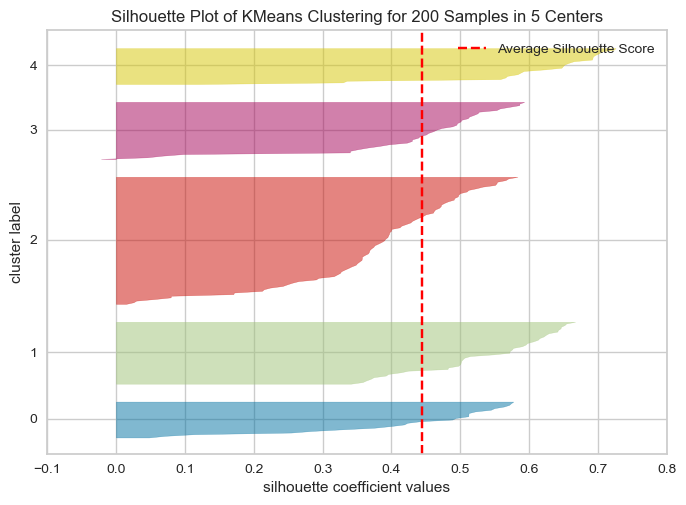

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:
model = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_numerics)
visualizer.poof()

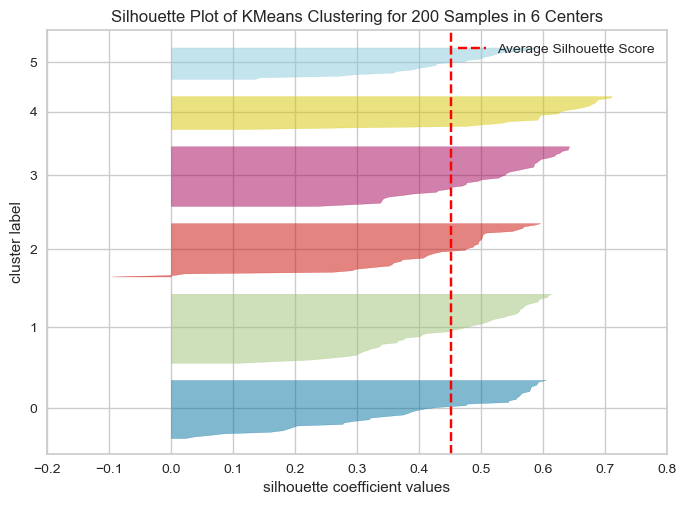

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
model = KMeans(n_clusters=6, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_numerics)
visualizer.poof()

<a id='K-Mean5'></a>
#### 4.1.1 K-Means 5 Clusters<a href='#Top' style="text-decoration: none;"></a>

In [18]:
df_KMean5 = df_numerics.copy()

KMean5_clusters = KMeans(n_clusters=5, init='k-means++').fit(df_KMean5) 
df_KMean5.loc[:,'Cluster'] = KMean5_clusters.labels_ 

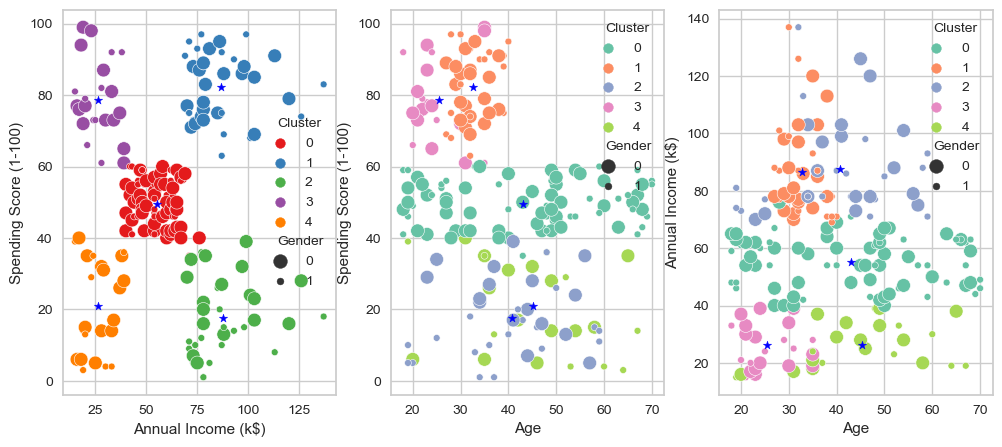

In [19]:
def plot_kmean_clusters(df,KMean_clusters):
    fig1, (axes) = plt.subplots(1,3,figsize=(12,5))
    sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=df,
                    hue='Cluster', ax=axes[0], palette='Set1', legend='full', size='Gender') 
    sns.scatterplot('Age', 'Spending Score (1-100)', data=df,
                    hue='Cluster', palette='Set2', ax=axes[1], legend='full', size='Gender') 
    sns.scatterplot('Age', 'Annual Income (k$)', data=df,
                    hue='Cluster', palette='Set2', ax=axes[2], legend='full', size='Gender') 
    
    axes[0].scatter(KMean_clusters.cluster_centers_[:,0],KMean_clusters.cluster_centers_[:,2], marker='*', s=40, c="blue")
    axes[1].scatter(KMean_clusters.cluster_centers_[:,1],KMean_clusters.cluster_centers_[:,2], marker='*', s=40, c="blue")
    axes[2].scatter(KMean_clusters.cluster_centers_[:,1],KMean_clusters.cluster_centers_[:,0], marker='*', s=40, c="blue")
    
    plt.show()

plot_kmean_clusters(df_KMean5,KMean5_clusters)

In [20]:
KM_5cluster_sizes = df_KMean5.groupby('Cluster').size().to_frame()
KM_5cluster_sizes.columns = ["KM_5_Clusters"]
KM_5cluster_sizes

,KM_5_Clusters
Cluster,
0,79
1,39
2,36
3,23
4,23


<a id='K-Mean6'></a>
#### 4.1.2 K-Means 6 Clusters<a href='#Top' style="text-decoration: none;"></a>

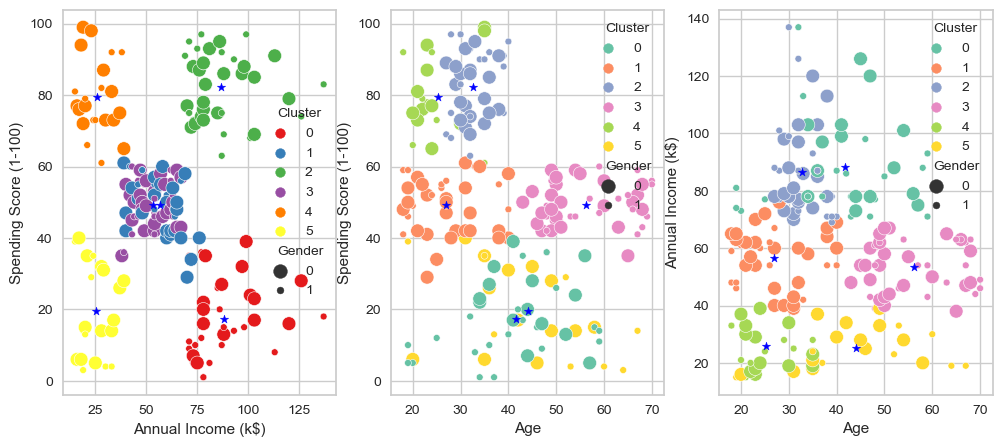

In [21]:
df_KMean6 = df_numerics.copy()

KMean6_clusters = KMeans(n_clusters=6, init='k-means++').fit(df_KMean6) 
df_KMean6.loc[:,'Cluster'] = KMean6_clusters.labels_ 

plot_kmean_clusters(df_KMean6,KMean6_clusters)

In [22]:
KM_6cluster_sizes = df_KMean6.groupby('Cluster').size().to_frame()
KM_6cluster_sizes.columns = ["KM_6_Clusters"]
KM_6cluster_sizes

,KM_6_Clusters
Cluster,
0,35
1,38
2,39
3,45
4,22
5,21


<a id='FC'></a>
### 4.2 Fuzzy C-Means<a href='#Top' style="text-decoration: none;"></a>

Fuzzy clustering (also referred to as soft clustering or soft k-means) is a form of clustering in which each data point can belong to more than one cluster.

In [23]:
from fcmeans import FCM 

number_clusters = 5 
df_Fuzzy = df_numerics.copy()

fcm = FCM(n_clusters=number_clusters)
fcm.fit(df_Fuzzy.values)
fcm_centers = fcm.centers
fcm_labels = fcm.predict(df_Fuzzy.values) 

df_Fuzzy['Cluster'] = fcm_labels

Fuzzy_cluster_sizes = df_Fuzzy.groupby('Cluster').size().to_frame()
Fuzzy_cluster_sizes.columns = ["Fuzzy_5_Clusters"]
Fuzzy_cluster_sizes

,Fuzzy_5_Clusters
Cluster,
0,25
1,39
2,39
3,62
4,35


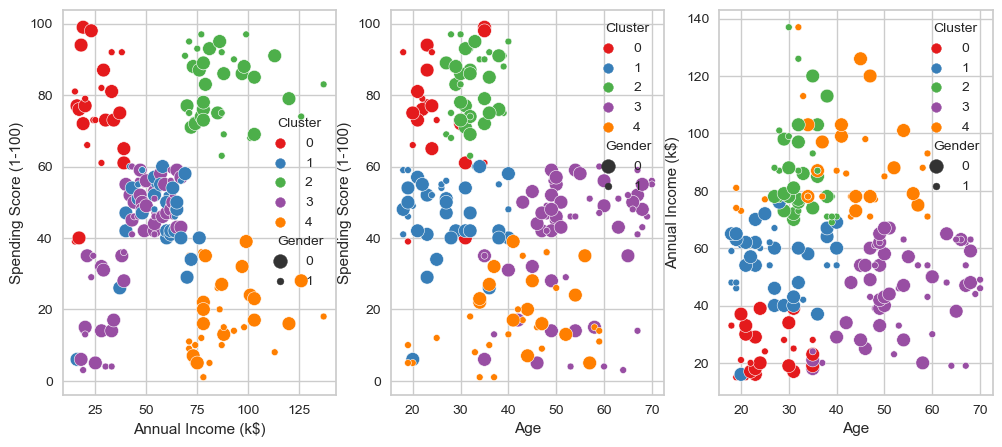

In [24]:
def plot_clusters(df):

    fig, (axes) = plt.subplots(1,3,figsize=(12,5))
    sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=df,
                    hue='Cluster', ax=axes[0], palette='Set1', legend='full', size='Gender') 
    sns.scatterplot('Age', 'Spending Score (1-100)', data=df,
                    hue='Cluster', palette='Set1', ax=axes[1], legend='full', size='Gender') 
    sns.scatterplot('Age', 'Annual Income (k$)', data=df,
                hue='Cluster', palette='Set1', ax=axes[2], legend='full', size='Gender') 
    plt.show()
    
plot_clusters(df_Fuzzy)

<a id='DBSCAN'></a>
### 4.3 DBSCAN (Density Based Spatial Clustering of Applications with Noise)<a href='#Top' style="text-decoration: none;"></a>


DBSCAN is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).  In DBSCAN there are two major hyperparameters:

* `eps`
* `min_samples`

I will first investigated the hyperparameter combinations.

In [25]:
eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(df_numerics, DBS_clustering.labels_))


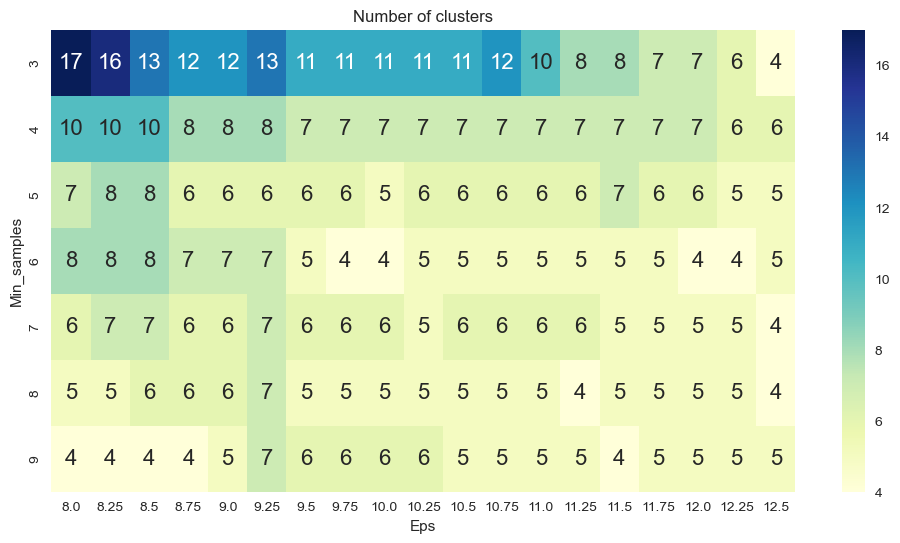

In [26]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()    

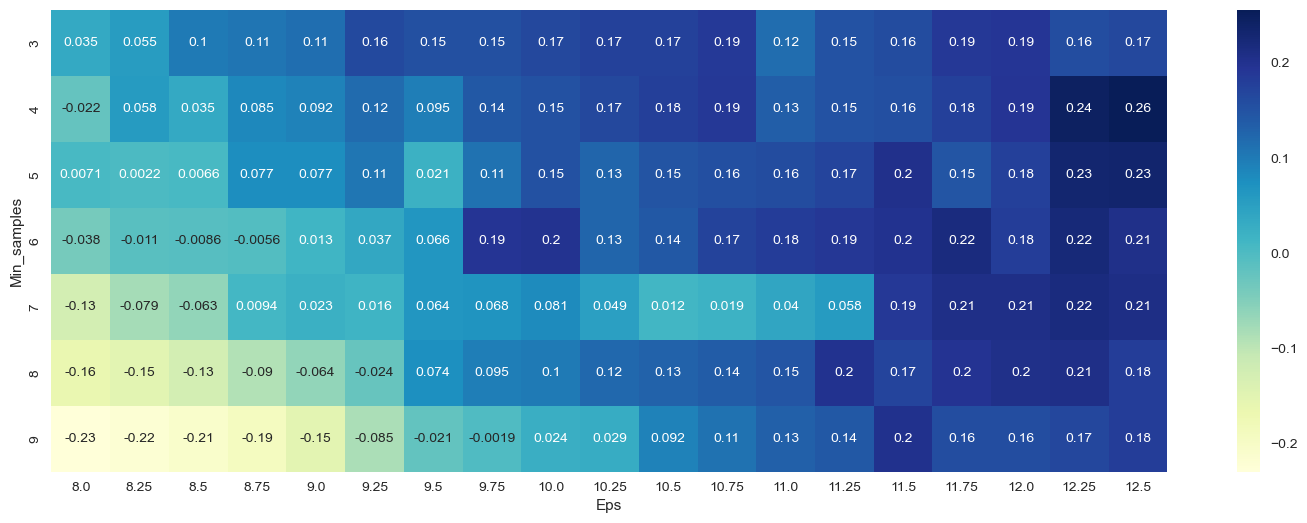

In [27]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

**Maximum Silhuette is 0.26 for eps=12.5 and min_samples=4, number of clusters**

In [28]:
df_DBSCAN = df_numerics.copy()

DBS_clusters = DBSCAN(eps=12.5, min_samples=4).fit(df_DBSCAN)
df_DBSCAN.loc[:,'Cluster'] = DBS_clusters.labels_ 

DBSCAN_cluster_sizes = df_DBSCAN.groupby('Cluster').size().to_frame()
DBSCAN_cluster_sizes.columns = ["DBSCAN_6_Clusters"]
DBSCAN_cluster_sizes

,DBSCAN_6_Clusters
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


* DBSCAN created 5 clusters plus outliers cluster (-1), which has 18 outliers.
* Sizes of clusters 0-4 vary significantly - some have only 4 or 8 observations. 

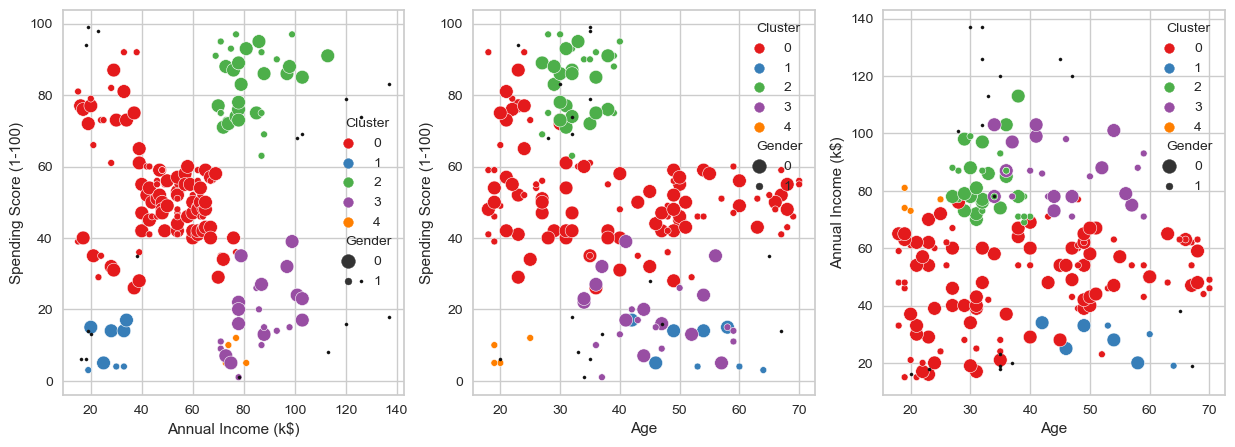

In [29]:
outliers = df_DBSCAN[df_DBSCAN['Cluster']==-1]

fig2, (axes) = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=df_DBSCAN[df_DBSCAN['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45, size='Gender') 
sns.scatterplot('Age', 'Spending Score (1-100)',
                data=df_DBSCAN[df_DBSCAN['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45, size='Gender') 
sns.scatterplot('Age', 'Annual Income (k$)',
                data=df_DBSCAN[df_DBSCAN['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[2], legend='full', s=45, size='Gender') 

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[2].scatter(outliers['Age'], outliers['Annual Income (k$)'], s=5, label='outliers', c="k")

plt.show()

<a id='Hierarchical'></a>
### 4.4 Heirarchal (Agglomerative)<a href='#Top' style="text-decoration: none;"></a>

Hierarchical clustering is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom. Strategies for hierarchical clustering generally fall into two categories:

* Agglomerative: This is a "bottom-up" approach: Each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
* Divisive: This is a "top-down" approach: All observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

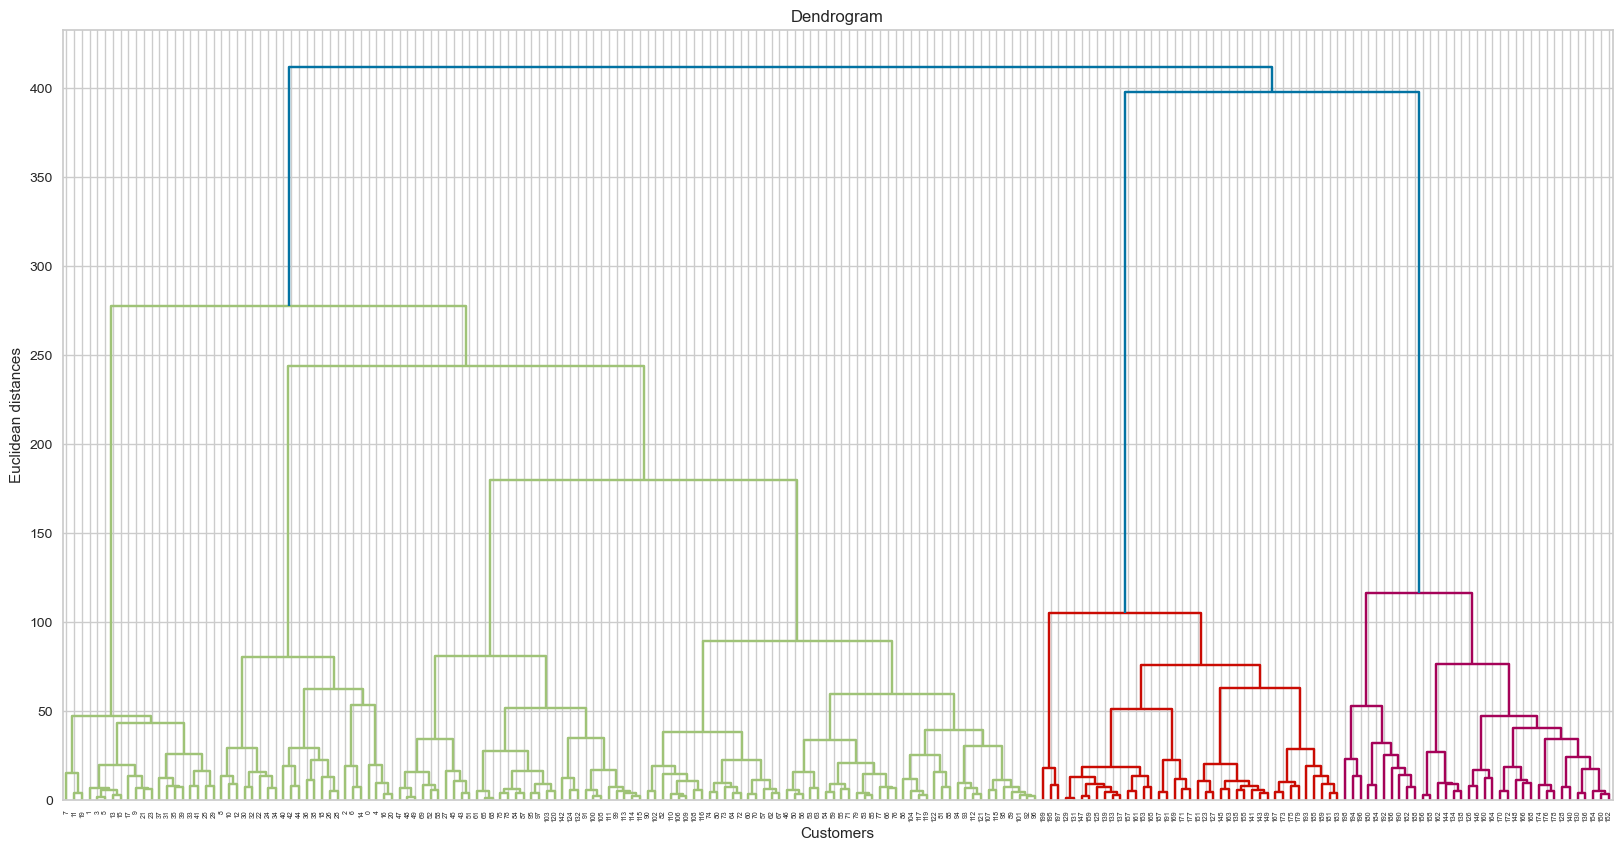

In [30]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(df_numerics, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [31]:
df_Heirarchal= df_numerics.copy()

Heirarchal_Clusters = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
labels = Heirarchal_Clusters.fit_predict(df_Heirarchal)
df_Heirarchal.loc[:,'Cluster'] = labels 

Heirarchal_cluster_sizes = df_Heirarchal.groupby('Cluster').size().to_frame()
Heirarchal_cluster_sizes.columns = ["Heirarchal_5_Clusters"]
Heirarchal_cluster_sizes

,Heirarchal_5_Clusters
Cluster,
0,83
1,35
2,39
3,20
4,23


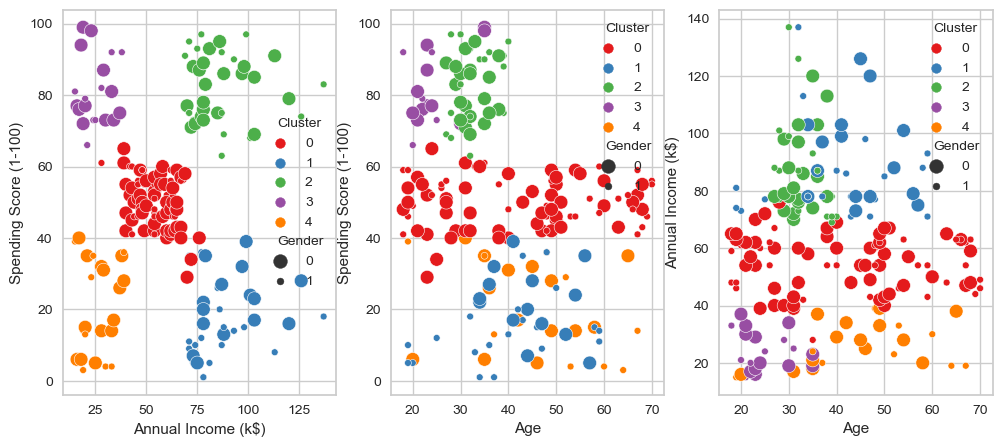

In [32]:
plot_clusters(df_Heirarchal)

<a id='AP'></a>
### 4.5 Affinity Propagation<a href='#Top' style="text-decoration: none;"></a>

Affinity propagation (AP) is a clustering algorithm based on the concept of "message passing" between data points. Unlike clustering algorithms such as k-means or k-medoids, affinity propagation does not require the number of clusters to be determined or estimated before running the algorithm.


In Affinity propagation there are two major hyperparameters:

* Preference which is a negative number and controls how many exemplars are used
* Damping factor which prevents numerical oscillations when updating messages

In [33]:
no_of_clusters = []
preferences = range(-20000,-5000,100) 
ap_sil_score = [] 

for p in preferences:
    AP = AffinityPropagation(preference=p, max_iter=200).fit(df_numerics)
    no_of_clusters.append((len(np.unique(AP.labels_))))
    ap_sil_score.append(silhouette_score(df_numerics, AP.labels_))
    
ap_results = pd.DataFrame([preferences, no_of_clusters, ap_sil_score], index=['preference','clusters', 'sil_score']).T
ap_results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

,preference,clusters,sil_score
82,-11800.0,6.0,0.451356
27,-17300.0,6.0,0.451202
55,-14500.0,6.0,0.451202
53,-14700.0,6.0,0.451202
52,-14800.0,6.0,0.451202


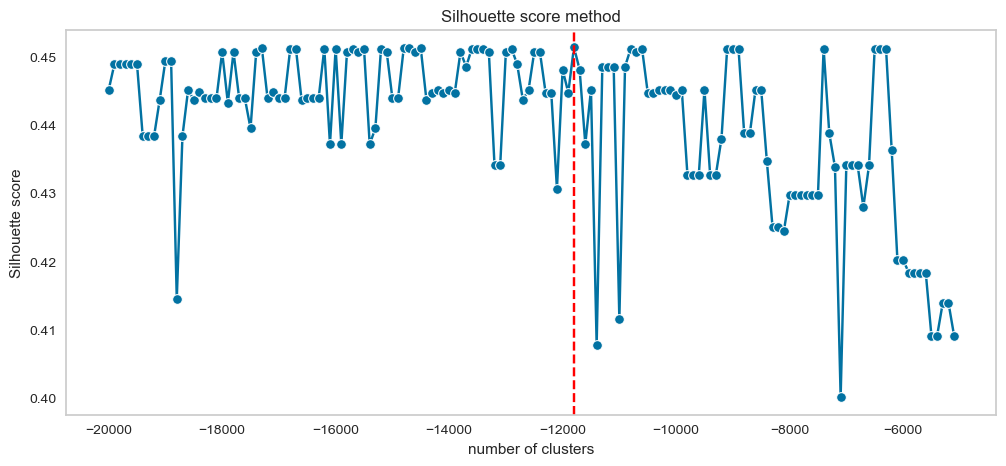

In [34]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(preferences, ap_sil_score, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(-11800, ls="--", c="red")
plt.grid()
plt.show()

In [35]:
df_AP = df_numerics.copy()

AP_Clusters = AffinityPropagation(preference=-11800).fit(df_AP)
df_AP.loc[:,'Cluster'] = AP_Clusters.labels_ 

AP_cluster_sizes = df_AP.groupby('Cluster').size().to_frame()
AP_cluster_sizes.columns = ["AP_6_Clusters"]
AP_cluster_sizes

,AP_6_Clusters
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


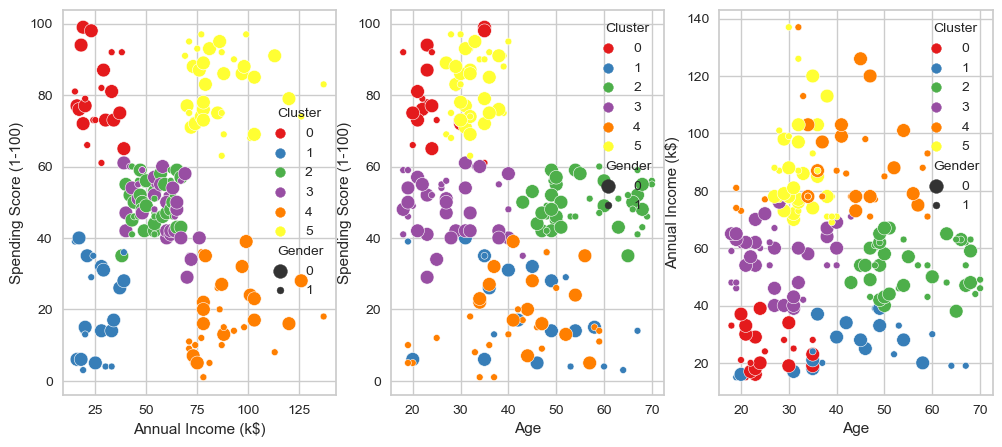

In [36]:
plot_clusters(df_AP)

<a id='Comparison'></a>
## 5. Comparison and Conclusion <a href='#Top' style="text-decoration: none;"></a>

In this step,  clusters genereated from five algorithms will be displayed in 3d plot and discussed.

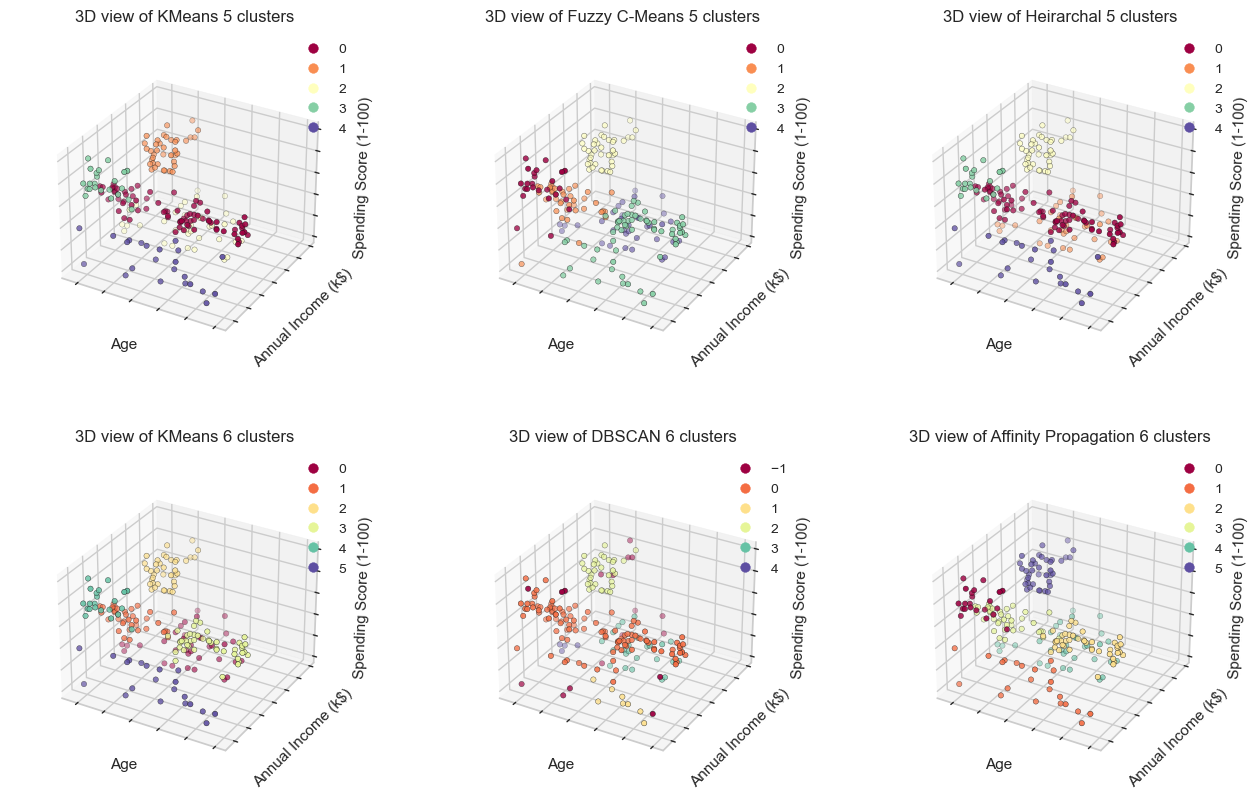

In [37]:
df = [df_KMean5, df_Fuzzy, df_Heirarchal, df_KMean6,df_DBSCAN,  df_AP]
titles = ['KMeans 5', 'Fuzzy C-Means 5', 'Heirarchal 5', 'KMeans 6', 'DBSCAN 6', 'Affinity Propagation 6']
rowcols =[231,232,233,234,235,236]

fig = plt.figure(figsize=(16,10))

for (rowcol, df, title) in zip(rowcols, df, titles):
    
    ax = fig.add_subplot(rowcol, projection='3d')

    sc = ax.scatter(df['Age'],
               df['Annual Income (k$)'],
               df['Spending Score (1-100)'],
               c=df['Cluster'],
               s=15, edgecolor='k', cmap="Spectral")
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income (k$)')
    ax.set_zlabel('Spending Score (1-100)')
    ax.set_title('3D view of ' + title +' clusters')
    ax.dist = 12
    plt.legend(*sc.legend_elements())
    
plt.show()        
 

In [38]:
clusters = pd.concat([KM_5cluster_sizes,Fuzzy_cluster_sizes, Heirarchal_cluster_sizes, 
                      KM_6cluster_sizes,  DBSCAN_cluster_sizes, AP_cluster_sizes],axis=1, sort=False)
clusters

,KM_5_Clusters,Fuzzy_5_Clusters,Heirarchal_5_Clusters,KM_6_Clusters,DBSCAN_6_Clusters,AP_6_Clusters
Cluster,,,,,,
0,79.0,25.0,83.0,35.0,112.0,22.0
1,39.0,39.0,35.0,38.0,8.0,22.0
2,36.0,39.0,39.0,39.0,34.0,44.0
3,23.0,62.0,20.0,45.0,24.0,39.0
4,23.0,35.0,23.0,22.0,4.0,34.0
5,NaN,NaN,NaN,21.0,NaN,39.0
-1,NaN,NaN,NaN,NaN,18.0,NaN


From the above comparisons, it is clear that DBSCAN failed to generate reasonable clusters. 


Among the 5 clusters, K-Means, Fuzzy C-Means and Heirarchal algorithm generated similar result. Below is the K-Means 5 cluster result

1. **Medium** income  - **Medium** spending - 79 
2. **Low** income  - **Low** spending - 23
3. **High** income - **High** spending -39
4. **High** income  - **Low**  spending - 36
5. **Low** income  - **High** spending -23


Results of K-Means 6 cluster and Affinity Propagation are similar. In the  6 cluster reuslt, the **Medium** income   **Medium** group was divided into 2 groups: 

1. Age under 40
2. Age above 40

### Conclusion:
1. There are five clearly customer grops the combination of feature: speending score and annual income and each features can categorized into Low, Medium, High three level
2. The biggest cluster of customers are Medium income - Medium spending, which can be futher divided into 2 sub-group by age.

Thanks to Robert Kwiatkwowski's [Kaggle notebook](https://www.kaggle.com/code/datark1/customers-clustering-k-means-dbscan-and-ap/notebook)

